In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import time
from pathlib import Path

import cv2 as cv
import numpy as np
import json

import matplotlib.pyplot as plt

from collections import OrderedDict

from datagen.imgen.ops import boxes_ops
from datagen.imgen import transforms
from datagen.imgen.content import utils as content_utils
from datagen.config import data_config
from datagen.imgen.io import fop

from tqdm import tqdm

from datagen.imgen.idcard import combiner 
from datagen.imgen.idcard import generator

In [210]:
#declare parameter
csv_path = '/data/idcard/results/csv/idcard_1k_1612871794.csv'
dst_path = '/data/idcard/results/base'
image_path = '/data/idcard/source/idcard/base3.png'
json_path = '/data/idcard/source/idcard/base3.json'
photo_path = '/data/idcard/source/face/'


In [211]:
cleaned_params = generator.clean_parameters(csv_path, dst_path, image_path, json_path, photo_path)
dframe, dst_path, photo_data, image_path, json_path = cleaned_params

In [212]:
%%time
idx = 0
data = dframe.iloc[idx].to_dict()        
result = generator.generate_single(data, dst_path, image_path, json_path, photo_path, randomize=True)

CPU times: user 431 ms, sys: 11.9 ms, total: 442 ms
Wall time: 442 ms


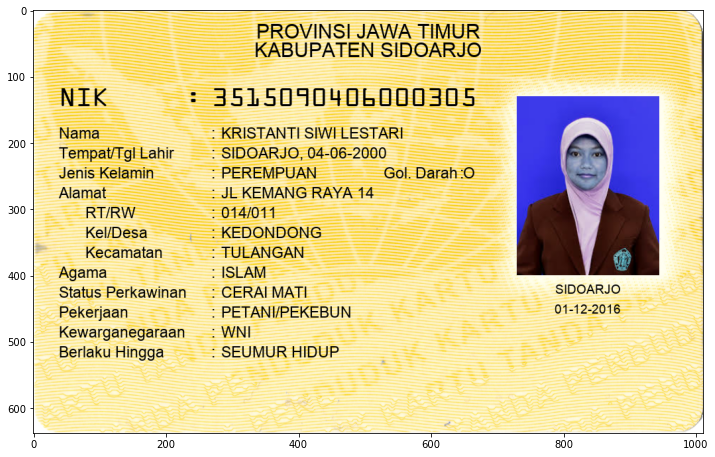

In [213]:
plt.figure(figsize=(12,12))
plt.imshow(result['image_data'])

In [90]:
result['json_data'].keys()

dict_keys(['image_filename', 'json_filename', 'size', 'points', 'objects'])

In [91]:
from datagen.imgen.content import utils
config = utils.inject_config(data, file_path=json_path)

hasil analisa sementara
1. effect tangan yang memegang KTP harus dibuat
2. effect shadow masih bermasalah, karena effect nya masih belum menyerupai effect shadow saat di foto
3. effect ktp tua dan rusak perlu dibuat, karena ktp tua dan rusak harus di serupakan
4. posisi teks dan foto harus di random juga, untuk menciptakan kondisi text yang tidak beraturan
5. foto ktp perlu di tambah, untuk yang laki - laki maupun perempuan, unutk menambah variant foto nya, karena ada masalah juga di bagian ini


1. Create Hand Effect (hard complexity)
2. Fix or Create new Shadow Effect (medium complexity) (fix)
3. Old Document Effect (medium complexity)
4. Broken Document Effect (Noise Effect) (fix)
5. Randomize text position (medium complexity) (fix)
6. Randomize Picture Position (medium complexity)
7. Add more face for ktp (easy) (fix) 


In [8]:
random.uniform(1,2)

1.564880446868961

In [9]:
a = (1,2)
random.uniform(*a)

1.1872094712294723

In [112]:
random.choice([1,2,3])

3